In [1]:
import os
import sys
import pathlib

module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from utils.processImage import get_subimage, process_image, plot_subimages, stitch_subimages
from utils.solver import sudoku, solve_sudoku, plot_sudoku
import cv2 as cv

TEST_IMAGES = pathlib.Path.cwd().parent.joinpath("test_images")

d:\Data Science\sudoku-solver


## Solving a Sudoku given a numpy array

In [2]:
input_array = np.array(
[[2, 0, 6, 5, 0, 0, 4, 1, 9],
 [9, 0, 5, 0, 0, 2, 0, 0, 8],
 [0, 0, 0, 3, 9, 4, 6, 0, 5],
 [0, 5, 7, 4, 0, 0, 0, 6, 0],
 [0, 1, 0, 9, 0, 8, 0, 4, 0],
 [4, 0, 0, 0, 5, 0, 3, 8, 0],
 [1, 7, 4, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 6, 7, 9, 0, 0, 0],
 [0, 0, 9, 0, 4, 1, 8, 0, 3]])

s = sudoku(input_array)
s

[[2 0 6 5 0 0 4 1 9]
 [9 0 5 0 0 2 0 0 8]
 [0 0 0 3 9 4 6 0 5]
 [0 5 7 4 0 0 0 6 0]
 [0 1 0 9 0 8 0 4 0]
 [4 0 0 0 5 0 3 8 0]
 [1 7 4 0 0 0 0 0 0]
 [0 0 0 6 7 9 0 0 0]
 [0 0 9 0 4 1 8 0 3]]

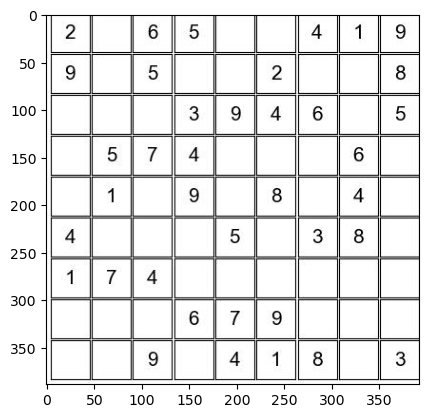

In [3]:
plt.imshow(plot_sudoku(s))

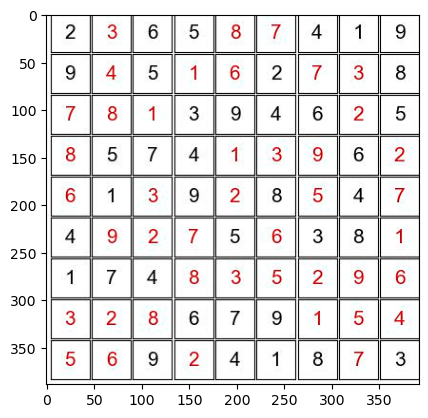

In [4]:
plt.imshow(solve_sudoku(s))

##  Reading the Sudoku from a good quality top-down image of a Sudoku

In [5]:
fp=TEST_IMAGES.joinpath("sudoku_test.png")

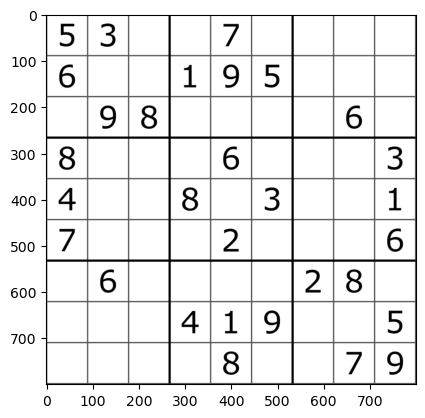

In [6]:
image = imread(fp)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = cv.fastNlMeansDenoising(np.uint8(image))

plt.imshow(image, cmap='gray')
plt.show()

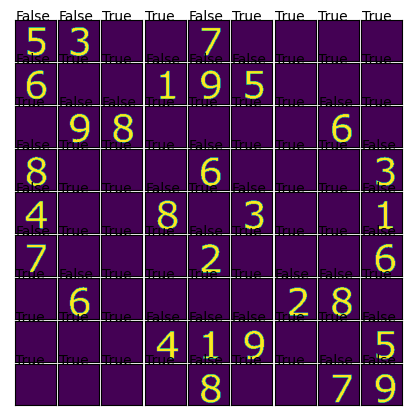

In [7]:
plot_subimages(image)

[0, 1, 4, 9, 12, 13, 14, 19, 20, 25, 27, 31, 35, 36, 39, 41, 44, 45, 49, 53, 55, 60, 61, 66, 67, 68, 71, 76, 79, 80]
53761959868 6348317266 284195879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

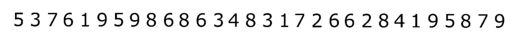

In [8]:
s=process_image(fp)
s

[0, 1, 4, 9, 12, 13, 14, 19, 20, 25, 27, 31, 35, 36, 39, 41, 44, 45, 49, 53, 55, 60, 61, 66, 67, 68, 71, 76, 79, 80]
53761959868 6348317266 284195879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

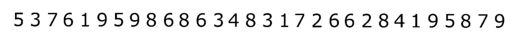

In [9]:
s=process_image(image)
s

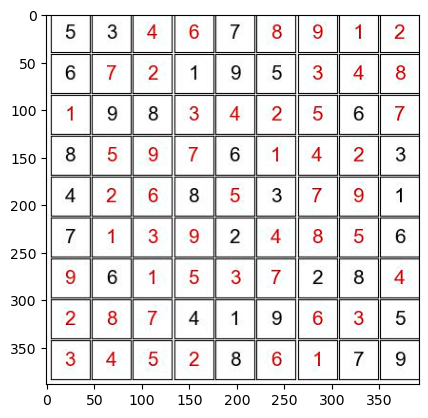

In [10]:
plt.imshow(solve_sudoku(s))

## Example 2: From unwarped image



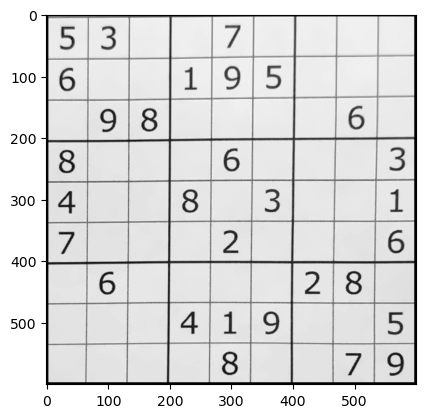

In [11]:
fp=TEST_IMAGES.joinpath("sudoku_wiki_unwarped.png")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()


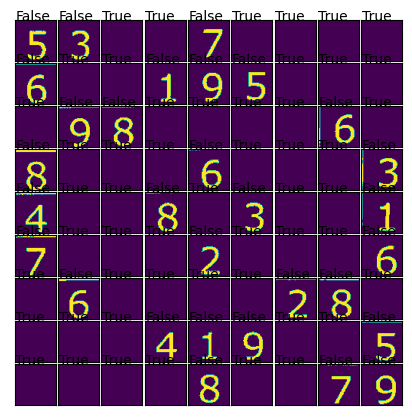

In [12]:
plot_subimages(image)

[0, 1, 4, 9, 12, 13, 14, 19, 20, 25, 27, 31, 35, 36, 39, 41, 44, 45, 49, 53, 55, 60, 61, 66, 67, 68, 71, 76, 79, 80]
537619 598 686 34 83 17 2 66 28419 5879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

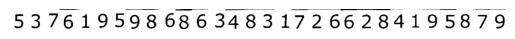

In [13]:
s=process_image(fp)
s

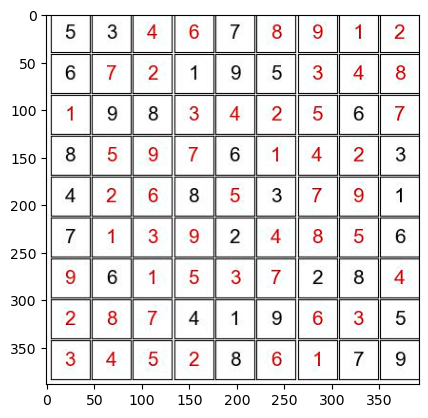

In [14]:
plt.imshow(solve_sudoku(s))

## NYT sudoku (easy)

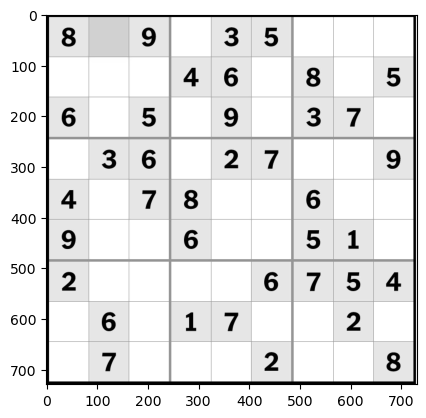

In [15]:
fp=TEST_IMAGES.joinpath("sudoku_nyt_easy.jpg")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()

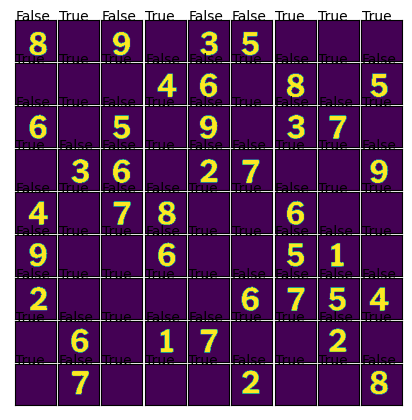

In [16]:
plot_subimages(image)

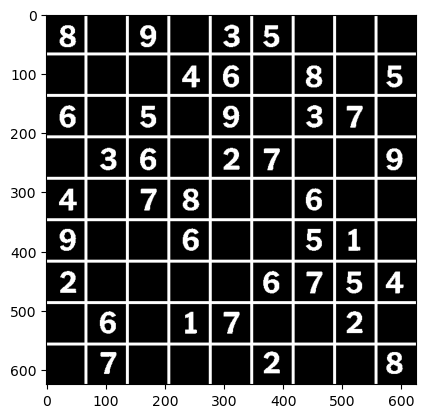

In [17]:
def get_all_subimages(im):
    rows = []
    for i in range(9):
        cols = []
        for j in range(9):
            simg = get_subimage(im, i,j)
            cols.append(simg)
            if j<8: cols.append(np.ones((simg.shape[0], 5))*255.0)
        rows.append(np.concatenate(cols, axis=1))
        if i<8: rows.append(np.ones((5, rows[0].shape[1]))*255.0)
    return np.concatenate(rows, axis=0)

plt.imshow(get_all_subimages(image), cmap='gray')

[0, 2, 4, 5, 12, 13, 15, 17, 18, 20, 22, 24, 25, 28, 29, 31, 32, 35, 36, 38, 39, 42, 45, 48, 51, 52, 54, 59, 60, 61, 62, 64, 66, 67, 70, 73, 77, 80]
893546 85 65 9 37 36279 47 86 9651 26 754 6 172 728
89354685659373627947869651267546172728


[[8 0 9 0 3 5 0 0 0]
 [0 0 0 4 6 0 8 0 5]
 [6 0 5 0 9 0 3 7 0]
 [0 3 6 0 2 7 0 0 9]
 [4 0 7 8 0 0 6 0 0]
 [9 0 0 6 0 0 5 1 0]
 [2 0 0 0 0 6 7 5 4]
 [0 6 0 1 7 0 0 2 0]
 [0 7 0 0 0 2 0 0 8]]

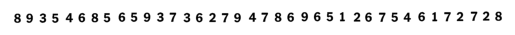

In [18]:
s=process_image(fp)
s

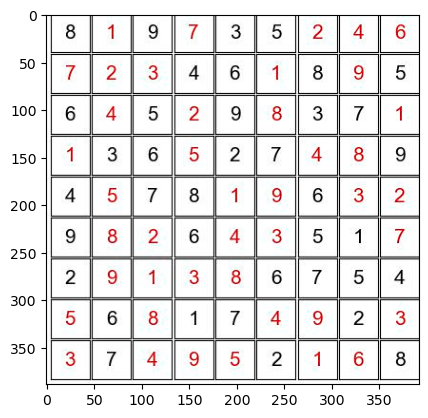

In [19]:
plt.imshow(solve_sudoku(s))

### NYT (medium)

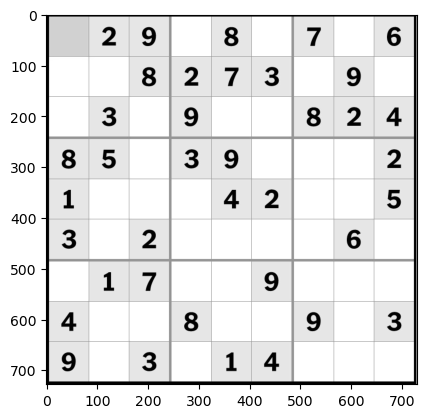

In [20]:
fp=TEST_IMAGES.joinpath("nyt_medium_12082022.jpg")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()

[1, 2, 4, 6, 8, 11, 12, 13, 14, 16, 19, 21, 24, 25, 26, 27, 28, 30, 31, 35, 36, 40, 41, 44, 45, 47, 52, 55, 56, 59, 63, 66, 69, 71, 72, 74, 76, 77]
29 8 7 6 8 2 7 3 9 3 9824 85 392142532 6179 4 8 939314
29876827393982485392142532617948939314


[[0 2 9 0 8 0 7 0 6]
 [0 0 8 2 7 3 0 9 0]
 [0 3 0 9 0 0 8 2 4]
 [8 5 0 3 9 0 0 0 2]
 [1 0 0 0 4 2 0 0 5]
 [3 0 2 0 0 0 0 6 0]
 [0 1 7 0 0 9 0 0 0]
 [4 0 0 8 0 0 9 0 3]
 [9 0 3 0 1 4 0 0 0]]

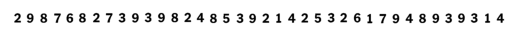

In [21]:
s=process_image(fp)
s

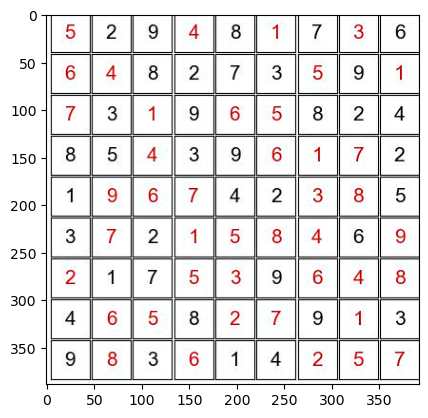

In [22]:
plt.imshow(solve_sudoku(s))